<a href="https://www.kaggle.com/code/nizarkarkar/house-prices-notebook-with-details?scriptVersionId=96783237" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from matplotlib.legend_handler import HandlerLine2D
from sklearn.preprocessing import LabelEncoder

### data visualization

We will try to load our Training and Test data set with some Pandas functions as well as inspect it in order to get an idea of the data we're working with. It is necessary to understand the data features before to start running any model.

In [3]:
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train.shape,test.shape 

((1460, 81), (1459, 80))

The Training data contains 123 rows and 8 columns (features), testing data has 40 rows and 6 columns.

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
idn=test["Id"]

we will need that later for submission

In [9]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Inspecting the target

<AxesSubplot:>

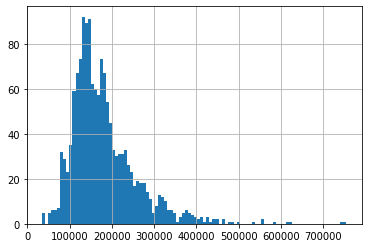

In [12]:
train["SalePrice"].hist(bins=100)

We can clearly see that the target variable has a normal ditribution that is skewed towards the left. Now let's calculate the Skewness and Kurtosis :

#skewness & kurtosis

In [13]:
print("the skewness of the target is %f "% train["SalePrice"].skew())
print('the kurtosis of the target is %f'% train["SalePrice"].kurt())

the skewness of the target is 1.882876 
the kurtosis of the target is 6.536282


In fact skewed data can affect our machine learning's model so we will fix that by simply repalacing SalePrice by it's log 

<AxesSubplot:>

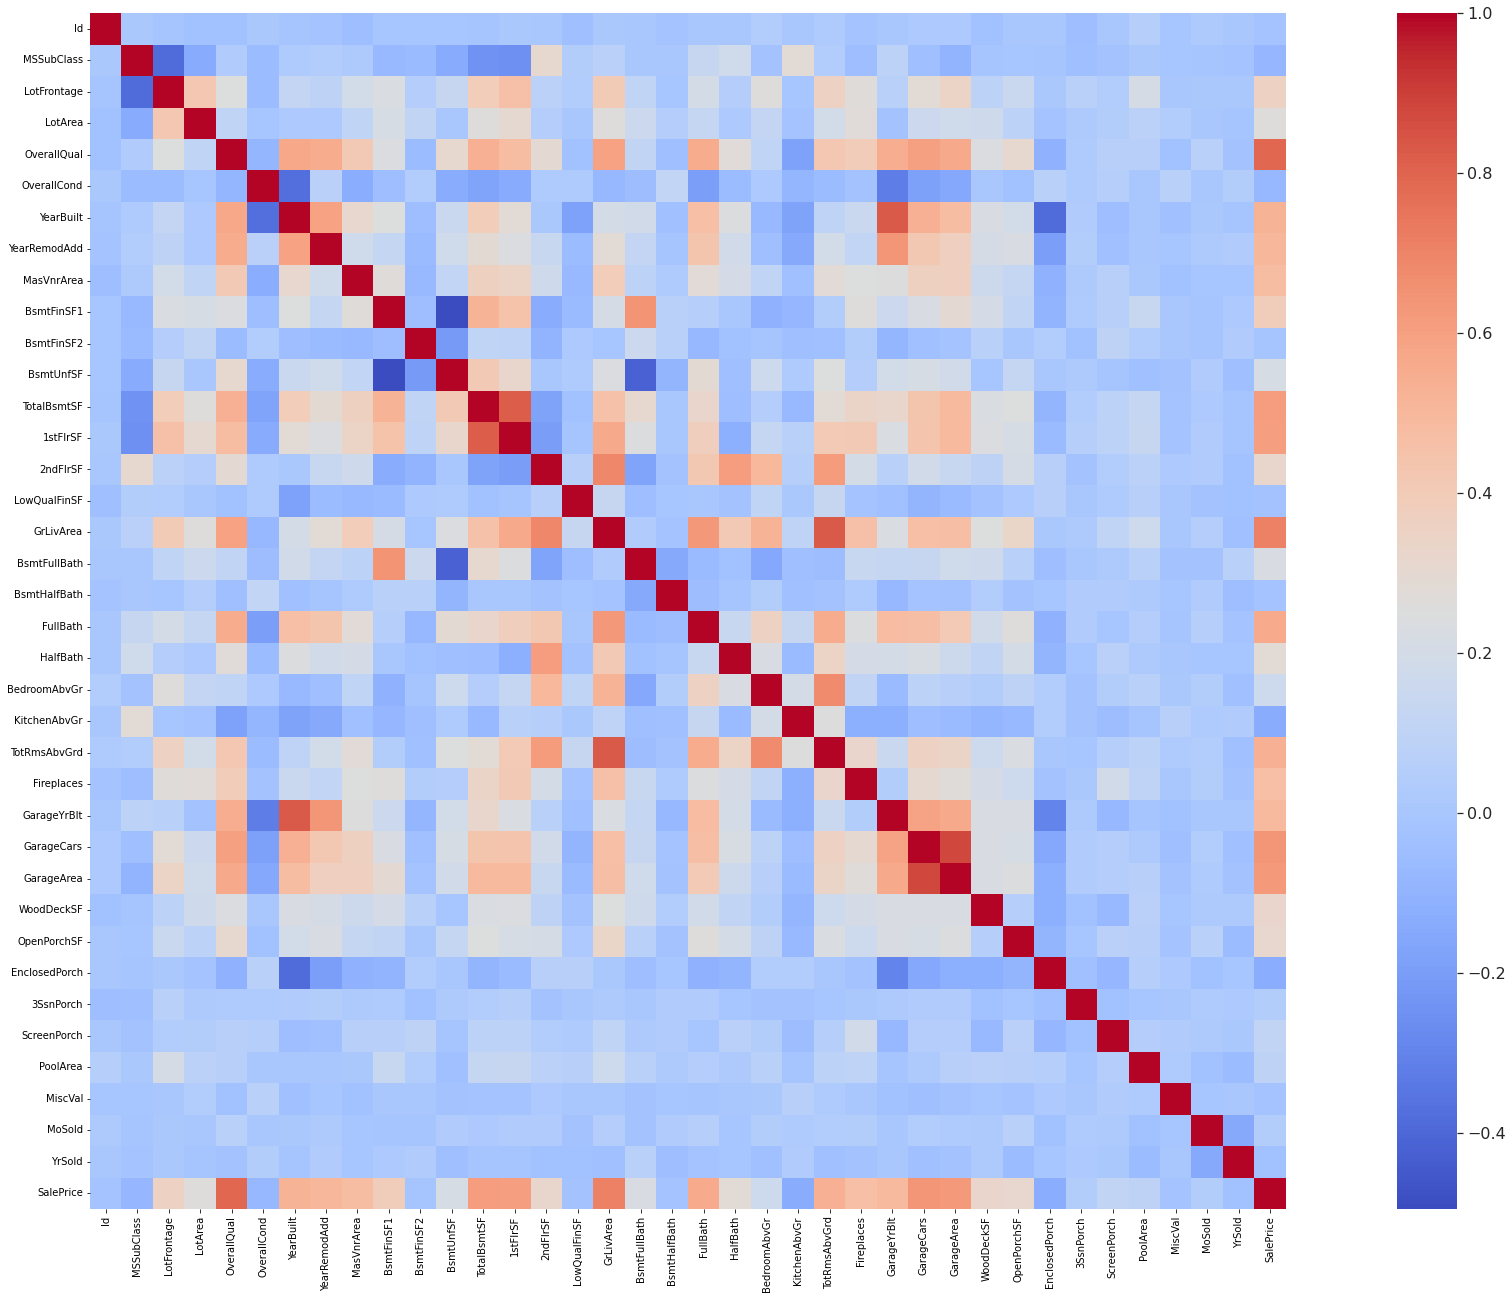

In [14]:
cormat=train.corr()
plt.subplots(figsize=(40,22))
sns.set(font_scale=1.45)
sns.heatmap(cormat,square=True,cmap='coolwarm')

In [15]:
corrolation=cormat["SalePrice"].sort_values(ascending=False)
features=corrolation.index[:10]
features 

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

As we can see these are the features that are most related to our target , this will give us an idea of what features we will focus on them

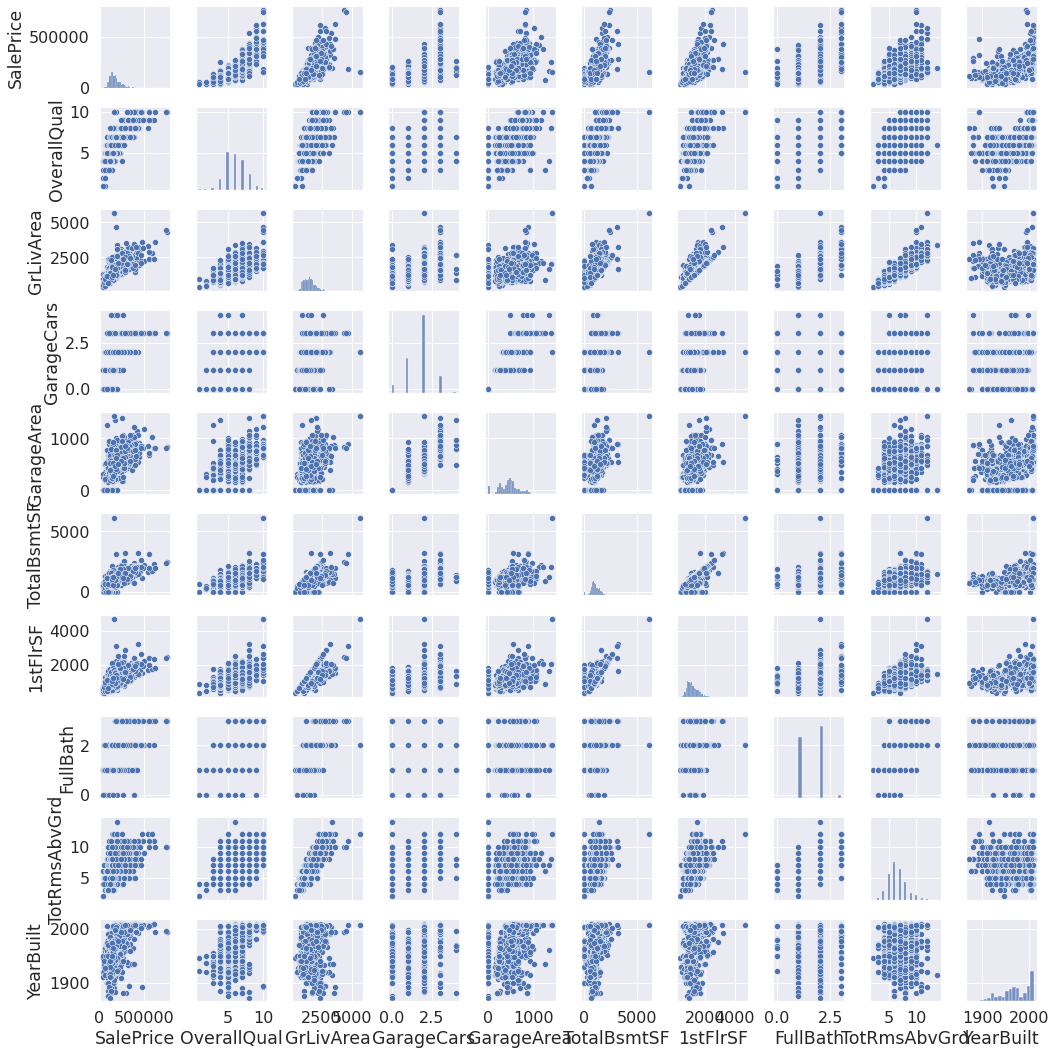

In [16]:
sns.pairplot(train[features],size=1.5)

In [17]:
train.drop(['Id'],axis=1,inplace=True)

We drop the Id column because it does not add any usefull information to our model

In [18]:
test.drop(['Id'],axis=1,inplace=True)

In [19]:
train_df=train.copy()
test_df=test.copy()

 Now we must deal with the categorical features and concert them into numerical features but first we muissing values in these categorical features 

In [20]:
train_cat=train.select_dtypes(include='object')

In [21]:
train_cat.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [22]:
test_cat=test_df.select_dtypes(include='object')

In [23]:
test_cat.isna().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [24]:
def transform(train,cat):
    for i in cat.columns:
        train[i].fillna("None",inplace=True)
    return train    

In [25]:
df_train=transform(train_df,train_cat)
df_test=transform(test_df,test_cat)

converting the categorical features to numerical features using Label encoder methode 

[https://miro.medium.com/max/588/1*KdCvKnI9ATVPiozmuRindA.png]

In [26]:
cat=df_train.select_dtypes(include='object')

In [27]:
from category_encoders import CountEncoder
enc = CountEncoder(normalize=True, cols=cat.columns)
df_train = enc.fit_transform(df_train)

In [28]:
cat_test=df_test.select_dtypes(include='object')

In [29]:
enct=CountEncoder(normalize=True,cols=cat_test.columns)
df_test=enct.fit_transform(df_test)

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   float64
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   float64
 5   Alley          1459 non-null   float64
 6   LotShape       1459 non-null   float64
 7   LandContour    1459 non-null   float64
 8   Utilities      1459 non-null   float64
 9   LotConfig      1459 non-null   float64
 10  LandSlope      1459 non-null   float64
 11  Neighborhood   1459 non-null   float64
 12  Condition1     1459 non-null   float64
 13  Condition2     1459 non-null   float64
 14  BldgType       1459 non-null   float64
 15  HouseStyle     1459 non-null   float64
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

then we use Multivariate Imputation By Chained Equations (MICE) it s an excellent methode to fill the missing data this video will explain how the MICE works  
(https://www.youtube.com/watch?v=WPiYOS3qK70)

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [32]:
estimator=RandomForestRegressor(max_depth=8)
mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)

In [33]:
final_train=mice.fit_transform(df_train)
final_train=pd.DataFrame(final_train,columns=df_train.columns)

In [34]:
final_test=mice.fit_transform(df_test)
final_test=pd.DataFrame(final_test,columns=df_test.columns)

In [35]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   float64
 1   MSZoning       1459 non-null   float64
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   float64
 5   Alley          1459 non-null   float64
 6   LotShape       1459 non-null   float64
 7   LandContour    1459 non-null   float64
 8   Utilities      1459 non-null   float64
 9   LotConfig      1459 non-null   float64
 10  LandSlope      1459 non-null   float64
 11  Neighborhood   1459 non-null   float64
 12  Condition1     1459 non-null   float64
 13  Condition2     1459 non-null   float64
 14  BldgType       1459 non-null   float64
 15  HouseStyle     1459 non-null   float64
 16  OverallQual    1459 non-null   float64
 17  OverallCond    1459 non-null   float64
 18  YearBuil

In [36]:
final_train["LogPrice"]=np.log(final_train["SalePrice"])

In [37]:
final_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogPrice
0,60.0,0.788356,65.0,8450.0,0.99589,0.937671,0.633562,0.897945,0.999315,0.720548,...,0.995205,0.807534,0.963014,0.0,2.0,2008.0,0.867808,0.820548,208500.0,12.247694
1,20.0,0.788356,80.0,9600.0,0.99589,0.937671,0.633562,0.897945,0.999315,0.032192,...,0.995205,0.807534,0.963014,0.0,5.0,2007.0,0.867808,0.820548,181500.0,12.109011
2,60.0,0.788356,68.0,11250.0,0.99589,0.937671,0.331507,0.897945,0.999315,0.720548,...,0.995205,0.807534,0.963014,0.0,9.0,2008.0,0.867808,0.820548,223500.0,12.317167
3,70.0,0.788356,60.0,9550.0,0.99589,0.937671,0.331507,0.897945,0.999315,0.180137,...,0.995205,0.807534,0.963014,0.0,2.0,2006.0,0.867808,0.069178,140000.0,11.849398
4,60.0,0.788356,84.0,14260.0,0.99589,0.937671,0.331507,0.897945,0.999315,0.032192,...,0.995205,0.807534,0.963014,0.0,12.0,2008.0,0.867808,0.820548,250000.0,12.429216


### Machine learning models 

In [38]:
X_train = final_train.drop(["SalePrice","LogPrice"], axis=1)
y_train = final_train["LogPrice"]

## feature scaling 

first we use features scaling methode this will helps the machine to learn quicly and have a better accuracy 

In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)

We split our data into trainnig data and validation data.IN fact the validation data gives us a good look about the performance of our model before testing it in the testing data and maybe avoiding overfiting



In [40]:
X_training,X_valid,y_training,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [41]:
lm=LinearRegression()
lm.fit(X_training,y_training)
print(lm)

LinearRegression()


Model Evaluation :Let's evaluate the model by checking out it's coefficients and how we can interpret them. This coefficient measures the intensity of the linear relationship between Y and X .For linear models, the intercept is the value of the linear predictor when all covariates are zero. In linear regression, this is equivalent to the y-intercept of the line of best fit. In logistic regression, it is the log odds of the baseline group

In [42]:
print(lm.intercept_)

12.02344599167948


In [43]:
print(lm.coef_)

[-1.07395090e-02  1.86130443e-02  1.02156608e-02  1.66555908e-02
  1.42505712e-02 -6.66520564e-03 -7.89020825e-03  1.71427139e-03
  4.65059362e-03 -4.33282085e-03 -7.85471836e-03 -2.81183793e-03
  2.05570261e-02  2.08897656e-02  1.87525883e-03 -8.84875315e-03
  9.17522088e-02  4.62416363e-02  4.40105424e-02  2.18776470e-02
 -4.54812420e-03  3.07929617e-04 -6.35771258e-03  1.32471599e-02
  1.57136867e-04 -1.69991342e-03 -6.85537911e-03  7.62010915e-03
  9.18457720e-04 -1.56830982e-02  3.70947887e-03 -4.89842164e-03
  4.94428984e-04 -2.65183469e+11  6.17268734e-03 -9.37938685e+10
 -2.56909236e+11  2.55071008e+11  5.45516011e-04  1.28307727e-02
  1.72914401e-02 -2.11217624e-03  3.77866621e+10  4.26680696e+10
  4.75261827e+09 -5.13625957e+10  1.80319343e-02  2.56216788e-03
  1.95925695e-02  1.20095382e-02 -3.08615570e-03 -6.54338650e-03
 -1.43039710e-02  1.81974625e-02  1.83455766e-02  2.35628639e-02
  3.37933836e-03  6.31554472e-03 -9.45229161e-04 -3.30605667e-03
  2.23561639e-02  2.21532

In [44]:
prediction=lm.predict(X_valid)
prediction=prediction.reshape(-1,1) 

In [45]:
submission_pred=np.exp(prediction)

In [46]:
print("MAE",metrics.mean_absolute_error(y_valid,submission_pred))
print("MSE",metrics.mean_squared_error(y_valid,submission_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_valid,submission_pred)))

MAE 185913.64076483477
MSE 54101853973.91631
RMSE 232598.05238633516


MAE'is the mean absolute error it s simply the mean of all error it measures accuracy of continuis variables 'MSE' is great for ensuring that our trained model has no outlier predictions with huge errors 'RMSE'it s purpose is To evaluate trained models for usefulness / accuracy

In [47]:
linreg=LinearRegression()
parameters_lin={"fit_intercept":[True,False],"normalize":[True,False],"copy_X":[True,False]}
grid_linreg=GridSearchCV(linreg,parameters_lin,verbose=1,scoring="r2")
grid_linreg.fit(X_training,y_training)
print("Best linreg Model"+str(grid_linreg.best_estimator_))
print("Best score :"+str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best linreg ModelLinearRegression(fit_intercept=False, normalize=True)
Best score :-1516107.4372539688


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.6s finished


# adding GridSearchfunction

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions

In [48]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: -1138.1519923418055
RMSE Score: 13.132685617364087


In [49]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: -1290620.0085447372


In [50]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Ridge Model: Ridge()
Best Score: 0.8833016813474865


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


In [51]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.7490646965656016
RMSE Score: 0.19491425105299603


In [52]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.8872604716941831


## Decision Tree Model

In [53]:
dtreg = DecisionTreeRegressor(random_state = 100)
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtreg, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best DecisionTreeRegressor Model: DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      min_samples_split=10, random_state=100,
                      splitter='random')
Best Score: 0.74623786807879


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    8.8s finished


In [54]:
dtr = grid_dtr.best_estimator_
dtreg.fit(X_training, y_training)
dtr_pred = dtreg.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.727345815720415
RMSE Score: 0.20317431035800182


In [55]:
scores_dtr = cross_val_score(dtreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.7074705819015947


## Random forest 

In [56]:
rfr = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rfr, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.3min finished


Best RandomForestRegressor Model: RandomForestRegressor(n_estimators=20)
Best Score: 0.864048615784369


In [57]:
rf = grid_rf.best_estimator_
rfr.fit(X_training, y_training)
rf_pred = rfr.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.8790521325120664
RMSE Score: 0.13531994684489845


In [58]:
scores_rf = cross_val_score(rfr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: 0.8705436324506062


## Xgboot Model 

In [59]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_training, y_training)

[20:47:29] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
xgb_pred = xgb.predict(X_valid)
r2_xgb = r2_score(y_valid, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))

R^2 Score: 0.9022620125385379
RMSE Score: 0.12164504037530001


## LGBM  regression 

In [61]:
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=20000,
                                       max_bin=2000, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
gbm = lightgbm.fit(X_training, y_training)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


In [62]:
gbm_pred = gbm.predict(X_valid)
r2_gbm = r2_score(y_valid, gbm_pred)
rmse_gbm = np.sqrt(mean_squared_error(y_valid, gbm_pred))
print("R^2 Score: " + str(r2_gbm))
print("RMSE Score: " + str(rmse_gbm))

R^2 Score: 0.8919355031780086
RMSE Score: 0.12790992038276564


In [63]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Decision Tree Regressor", "Random Forest Regressor","XGBoost","LGBM Regressor"],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5],  str(r2_dtr)[0:5], str(r2_rf)[0:5],str(r2_xgb)[0:5], str(r2_gbm)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_ridge)[0:8],  str(rmse_dtr)[0:8], str(rmse_rf)[0:8],str(rmse_xgb)[0:8], str(rmse_gbm)[0:8]]
})
model_performances.round(4)

print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


,Model,R Squared,RMSE
4,XGBoost,0.902,0.121645
5,LGBM Regressor,0.891,0.127909
3,Random Forest Regressor,0.879,0.135319
1,Ridge,0.749,0.194914
2,Decision Tree Regressor,0.727,0.203174
0,Linear Regression,-1138,13.13268


checking wich model is the best

In [64]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


,Model,R Squared,RMSE
4,XGBoost,0.902,0.121645
5,LGBM Regressor,0.891,0.127909
3,Random Forest Regressor,0.879,0.135319
1,Ridge,0.749,0.194914
2,Decision Tree Regressor,0.727,0.203174
0,Linear Regression,-1138,13.13268


as we can see the XGBoost gave us the best score 

In [65]:
def blend_models_predict(X):
    return ((0.05 * lm.predict(X)) + \
            (0.05 * linreg.predict(X)) + \
            (0.05 * ridge.predict(X)) + \
            (0.2 * gbm.predict(X)) + \
            (0.15 * rfr.predict(X)) + \
            (0.4 * xgb.predict(X)))

In [66]:
submission_pred = np.exp(blend_models_predict(final_test))
print(submission_pred)

[0. 0. 0. ... 0. 0. 0.]


In [67]:
submission_pred.shape

(1459,)

In [68]:
submission_df=pd.DataFrame({"Id":idn,"SalePrice":submission_pred})

In [69]:
submission_df.to_csv("houseprices222.csv", index=False)